# 20 Panda Functions to boost Data Analysis


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd

In [3]:
# Sample DataFrame
values_1 = np.random.randint(10, size = 10)
values_2 = np.random.randint(10, size = 10)
years = np.arange(2010, 2020)
groups = ['A','A','B','A','B','B','C','A','C','C']

df = pd.DataFrame ({'group' : groups, 'year': years, 'value_1':values_1, 'value_2':values_2})

df

,group,year,value_1,value_2
0,A,2010,1,5
1,A,2011,4,9
2,B,2012,1,6
3,A,2013,9,2
4,B,2014,7,3
5,B,2015,9,2
6,C,2016,2,5
7,A,2017,2,8
8,C,2018,1,7
9,C,2019,9,0


## 1. Query
Filter a dataframe based on a condition or apply a mask to get certain values.

In [4]:
df.query('value_1 < value_2')

,group,year,value_1,value_2
0,A,2010,1,5
1,A,2011,4,9
2,B,2012,1,6
6,C,2016,2,5
7,A,2017,2,8
8,C,2018,1,7


## 2. Insert
Used to add a new column to a dataframe, at any location using insert function.

We need to specify the position by passing an **index** as first argument, **column name** as second argument and **series** or **array-like** object as third argument.

In [5]:
# New Column
new_col = np.random.randn(10)

# Insert the new columns at position 2
df.insert(2, 'new_col', new_col)
df

,group,year,new_col,value_1,value_2
0,A,2010,1.601767,1,5
1,A,2011,0.959908,4,9
2,B,2012,1.449649,1,6
3,A,2013,0.208333,9,2
4,B,2014,-1.124627,7,3
5,B,2015,0.847298,9,2
6,C,2016,-1.407634,2,5
7,A,2017,-1.361605,2,8
8,C,2018,0.343628,1,7
9,C,2019,-1.439375,9,0


## 3. Cumsum
Function to calculate the cumulative sum, we can pair it with `groupby` and use the `cumsum` function to have powerful analysis.

In [6]:
# Grouping by groups and adding the value_2 in each row for cumulative sum
df['cumsum_2'] = df[['value_2', 'group']].groupby('group').cumsum()
df

,group,year,new_col,value_1,value_2,cumsum_2
0,A,2010,1.601767,1,5,5
1,A,2011,0.959908,4,9,14
2,B,2012,1.449649,1,6,6
3,A,2013,0.208333,9,2,16
4,B,2014,-1.124627,7,3,9
5,B,2015,0.847298,9,2,11
6,C,2016,-1.407634,2,5,5
7,A,2017,-1.361605,2,8,24
8,C,2018,0.343628,1,7,12
9,C,2019,-1.439375,9,0,12


## 4. Sample
Allows us to select values randomly from a **Series** or **DataFrame**. It is useful when we want to select a random sample from a distribution.

In [7]:
# Taking a sample 
sample1 = df.sample(n = 3)
sample1

,group,year,new_col,value_1,value_2,cumsum_2
6,C,2016,-1.407634,2,5,5
1,A,2011,0.959908,4,9,14
3,A,2013,0.208333,9,2,16


We specify the number of values with `n` parameter but we can also pass a ratio to `frac` parameter. For instance, 0.5 will return half of the rows.

In [8]:
# Taking another sample
sample2 = df.sample(frac = 0.5)
sample2

,group,year,new_col,value_1,value_2,cumsum_2
5,B,2015,0.847298,9,2,11
6,C,2016,-1.407634,2,5,5
8,C,2018,0.343628,1,7,12
0,A,2010,1.601767,1,5,5
7,A,2017,-1.361605,2,8,24


To obtain reproducible sample, we can use `random_state` parameter.

## 5. Where
It is used to replace values in rows or columns based on a condition. The default replacement values is NaN but we can also specify the value to be put as a replacement.

In [9]:
df['new_col'].where(df['new_col'] > 0, 0)

0    1.601767
1    0.959908
2    1.449649
3    0.208333
4    0.000000
5    0.847298
6    0.000000
7    0.000000
8    0.343628
9    0.000000
Name: new_col, dtype: float64

One important point is that **“where”** for Pandas and NumPy are not exactly the same. We can achieve the same result but with slightly different syntax. With **DataFrame.where**, the values that fit the condition are selected as is and the other values are replaced with the specified value. **Np.where** requires to also specify the value for the ones that fit the condition. The following two lines return the same result:

In [10]:
df['new_col'].where(df['new_col'] > 0 , 0)

np.where(df['new_col'] < 0, df['new_col'], 0)

array([ 0.        ,  0.        ,  0.        ,  0.        , -1.12462704,
        0.        , -1.40763366, -1.36160491,  0.        , -1.43937488])

## 6. Isin
`Isin` is kind of an advanced filtering, we can even filter values based on a list of selections.

In [11]:
# Using the isin function
years = ['2010', '2014', '2017']
df[df.year.isin(years)]

,group,year,new_col,value_1,value_2,cumsum_2
0,A,2010,1.601767,1,5,5
4,B,2014,-1.124627,7,3,9
7,A,2017,-1.361605,2,8,24


## 7. Loc and iloc
Loc and iloc are used to select rows and columns.
- `loc`: Select by labels
- `iloc`: Select by positions

In [12]:
# Using iloc to select by positions
df.iloc[:3, :2]

,group,year
0,A,2010
1,A,2011
2,B,2012


In [13]:
# Using iloc to select by labels(column names)
df.loc[:2, ['group', 'year', 'new_col']]

,group,year,new_col
0,A,2010,1.601767
1,A,2011,0.959908
2,B,2012,1.449649


**Note : Upper boundaries of indices are included when loc is used whereas they are excluded when iloc is used.** 

> Refer to the example above.

In [14]:
df.loc[[1, 3, 5], ['year', 'value_1']]

,year,value_1
1,2011,4
3,2013,9
5,2015,9


## 8. Pct_change
This function is used to calculate the percent change through the values in a series. Pct_change function is useful in comparing the percentage of change in a time series of elements.

> We have a series, [2, 3, 6]. If we apply pct_change to this series, the returned series will be [NaN, 0.5, 1.0]. There is a 50% increase from the first element to the second and 100% from the second to third one.

In [15]:
df.value_1.pct_change()

0         NaN
1    3.000000
2   -0.750000
3    8.000000
4   -0.222222
5    0.285714
6   -0.777778
7    0.000000
8   -0.500000
9    8.000000
Name: value_1, dtype: float64

## 9. Rank
Rank function assigns rank to the values. 
> Assume we have a series that contains [1, 7, 5, 3]. The ranks assigned to these values will be [1, 4, 3, 2].

In [16]:
df['rank_1'] = df['value_1'].rank()
df

,group,year,new_col,value_1,value_2,cumsum_2,rank_1
0,A,2010,1.601767,1,5,5,2.0
1,A,2011,0.959908,4,9,14,6.0
2,B,2012,1.449649,1,6,6,2.0
3,A,2013,0.208333,9,2,16,9.0
4,B,2014,-1.124627,7,3,9,7.0
5,B,2015,0.847298,9,2,11,9.0
6,C,2016,-1.407634,2,5,5,4.5
7,A,2017,-1.361605,2,8,24,4.5
8,C,2018,0.343628,1,7,12,2.0
9,C,2019,-1.439375,9,0,12,9.0


## 10. Melt
It is used to convert wide dataframes to narrow ones. Some dataframes are structured in a way that consecutive measurements or variable are represented as columns. In some cases, representing these columns as rows may fit better to our task.

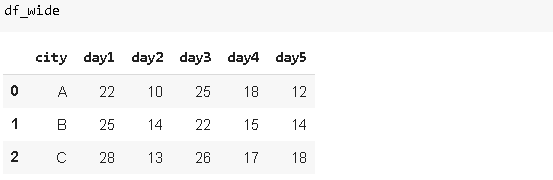

We can represent these days as rows in a column.

`df_wide.melt(id_vars = ['city'])`

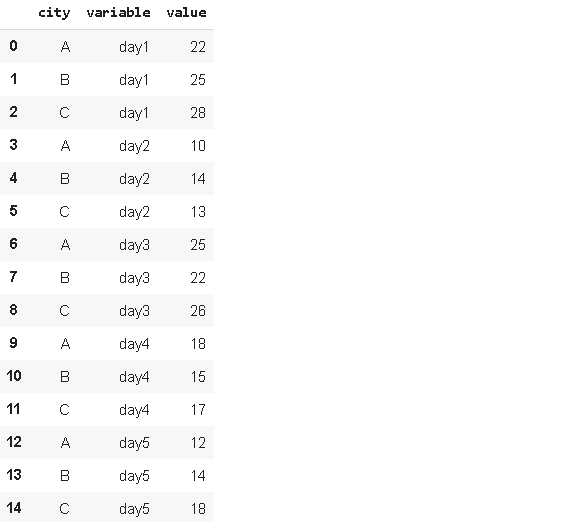

We can use **var_name** or **value_name** parameters of melt function to assign new column names.

## 11. Explode
Assume your dataset includes multiple entries of a feature on a single observation (row) but you want to analyze them on seperate rows.

In [17]:
# New dataset for this function
id = ['a', 'b', 'c']
day = [1 for i in range(3)]
measurements = [4, 6, [2, 3, 8]]

df1 = pd.DataFrame({'ID':id, 'measurement':measurements, 'days':day})
df1

,ID,measurement,days
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


In [18]:
df1.explode('measurement')

,ID,measurement,days
0,a,4,1
1,b,6,1
2,c,2,1
2,c,3,1
2,c,8,1


## 12. Nunique 
Nunique counts the number of unique entries over columns or rows. It is very useful in categorical features especially in cases where we do not know the number of categories beforehand. 

In [19]:
print(df.year.nunique())

print(df.group.nunique())

10
3


We can also directly apply nunique function to the dataframe and see the number of unique values in each column.
We can use the **axis** parameter and set it to 1 to get the unique values in rows.

In [20]:
df.nunique()

group        3
year        10
new_col     10
value_1      5
value_2      8
cumsum_2     8
rank_1       5
dtype: int64

## 13. Lookup 
It can be used to look up values in the DataFrame based on the values on other row, column pairs.

In [21]:
# Can be used to highlight the datas in the dataframe, will attach the images.

## 14. Infer_objects
Pandas support a wide range of data types, one of which is **object**. It tries to infer the better data types for object columns. 


In [22]:
# Will include examples 

## 15. Memory_usage
It return how much memory each row uses in bytes. It is useful especially when we work with large dataframes.

In [23]:
df_large = pd.DataFrame({'A': np.random.randn(1000000), 'B': np.random.randint(100, size = 1000000)})
df_large.shape

(1000000, 2)

In [24]:
df_large.memory_usage()

Index        128
A        8000000
B        4000000
dtype: int64

In [25]:
# Converting to MBs
df_large.memory_usage().sum() / (1024 ** 2)

11.4442138671875

## 16. Describe
Describe function calculates basic statistics for nuomeric columns which are count, mean, standard deviation, min and max values, median, first and third quartile. 

In [26]:
df.describe()

,year,new_col,value_1,value_2,cumsum_2,rank_1
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,2014.50000,0.007734,4.500000,4.700000,11.400000,5.50000
std,3.02765,1.231050,3.597839,2.907844,5.815688,2.94392
min,2010.00000,-1.439375,1.000000,0.000000,5.000000,2.00000
25%,2012.25000,-1.302360,1.250000,2.250000,6.750000,2.62500
50%,2014.50000,0.275981,3.000000,5.000000,11.500000,5.25000
75%,2016.75000,0.931756,8.500000,6.750000,13.500000,8.50000
max,2019.00000,1.601767,9.000000,9.000000,24.000000,9.00000


## 17. Merge
Merge() combines DataFrames based on values in shared columns.

In [32]:
# Making a new dataset to perform merge
df1 = pd.DataFrame({'a':[1, 2, 3], 'b': ['a', 'b', 'c'], 'c': [True, True, False]})
df2 = pd.DataFrame({'a':[10, 3, 6, 1], 'b': ['s', 'd', 'd', 'o'], 'c': [True, True, False, True]})

print(df1)
print(df2)

   a  b      c
0  1  a   True
1  2  b   True
2  3  c  False
    a  b      c
0  10  s   True
1   3  d   True
2   6  d  False
3   1  o   True


In [33]:
# Merging 
df_merge = pd.merge(df1, df2, on = 'a')
df_merge

,a,b_x,c_x,b_y,c_y
0,1,a,True,o,True
1,3,c,False,d,True


df1 and df2 are merged on the common values in column 'a'. The **how** parameter of merge function allows to combine dataframes in different ways. The possible values for how are 'inner', 'outer', 'left', 'right'. 

- inner: Only rows with same values in the column specifierd by on parameter. (default value)
- outer: All the rows
- left: All the rows from left Dataframe
- right: All the rows from right Dataframe

## 18. Select_dtypes
Select_dtypes frunction return a subset of the DataFrame's columns based on the condition set on data types. It allows to include or exclude certain data typed using **include** and **exclude** parameters.

In [40]:
print(df.dtypes)
df.select_dtypes(include='int32')

group        object
year          int32
new_col     float64
value_1       int32
value_2       int32
cumsum_2      int32
rank_1      float64
dtype: object


,year,value_1,value_2,cumsum_2
0,2010,1,5,5
1,2011,4,9,14
2,2012,1,6,6
3,2013,9,2,16
4,2014,7,3,9
5,2015,9,2,11
6,2016,2,5,5
7,2017,2,8,24
8,2018,1,7,12
9,2019,9,0,12


In [41]:
df.select_dtypes(exclude='int32')

,group,new_col,rank_1
0,A,1.601767,2.0
1,A,0.959908,6.0
2,B,1.449649,2.0
3,A,0.208333,9.0
4,B,-1.124627,7.0
5,B,0.847298,9.0
6,C,-1.407634,4.5
7,A,-1.361605,4.5
8,C,0.343628,2.0
9,C,-1.439375,9.0
